# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build a query url
units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Set up variables to store data related to weather check
city_number = 0
city_names = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Perform a weather check on each city using a series of successive API Calls
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    # Include a print log of each city as it is being processed (with the city number and city name)
    city_number = city_number +1
    print(f"Processing Record {city_number}: {city}")
    response = requests.get(url + city).json()
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_names.append(response["name"])
        # FOR TESTING (comment out next line when not testing) print out the JSON
        #pprint(response)
    except:
        print("City not found. Skipping...")
    # FOR TESTING (comment out next 2 lines when not testing) keep the set shorter than total number of cities
    if city_number == 10:
        break

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1: sechura
Processing Record 2: ushuaia
Processing Record 3: saint george
Processing Record 4: bakel
Processing Record 5: castro
Processing Record 6: clyde river
Processing Record 7: coquimbo
Processing Record 8: merauke
Processing Record 9: tuktoyaktuk
Processing Record 10: barrow
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create DataFrame
weather_dict = {
    "City": city_names,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(data = weather_dict)

# Export the city data into a .csv
weather_data.to_csv("../output_data/cities.csv", encoding="utf-8", index=True)

# Display the DataFrame
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sechura,-5.5569,-80.8222,74.52,60,21,9.33,PE,1629739579
1,Ushuaia,-54.8000,-68.3000,44.22,81,40,2.30,AR,1629739580
2,Saint George,37.1041,-113.5841,93.67,20,1,1.01,US,1629739436
3,Bakel,14.9050,-12.4568,89.96,54,100,5.91,SN,1629739580
4,Castro,-24.7911,-50.0119,80.73,29,0,8.30,BR,1629739580


In [5]:
# Display meaningful statistics
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,13.965500,-61.460280,63.952000,66.300000,59.200000,7.555000,1.629740e+09
std,46.113452,82.159018,21.949475,26.034379,40.063283,4.017255,4.564708e+01
min,-54.800000,-156.788700,32.020000,20.000000,0.000000,1.010000,1.629739e+09
25%,-20.710000,-105.393625,45.665000,55.500000,25.750000,5.790000,1.629740e+09
50%,4.674050,-69.967500,66.625000,71.500000,75.000000,7.605000,1.629740e+09
75%,61.366600,-54.583925,79.607500,86.750000,90.000000,10.387500,1.629740e+09
max,71.290600,140.333300,93.670000,93.000000,100.000000,13.800000,1.629740e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Remove the cities where the humidity is > 100%
weather_data = weather_data.loc[weather_data["Humidity"] <= 100]

weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,13.965500,-61.460280,63.952000,66.300000,59.200000,7.555000,1.629740e+09
std,46.113452,82.159018,21.949475,26.034379,40.063283,4.017255,4.564708e+01
min,-54.800000,-156.788700,32.020000,20.000000,0.000000,1.010000,1.629739e+09
25%,-20.710000,-105.393625,45.665000,55.500000,25.750000,5.790000,1.629740e+09
50%,4.674050,-69.967500,66.625000,71.500000,75.000000,7.605000,1.629740e+09
75%,61.366600,-54.583925,79.607500,86.750000,90.000000,10.387500,1.629740e+09
max,71.290600,140.333300,93.670000,93.000000,100.000000,13.800000,1.629740e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

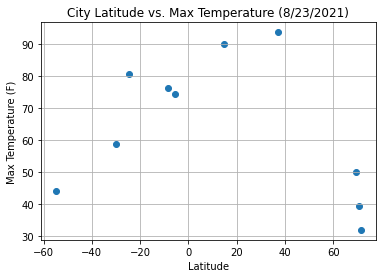

This scatter plot is analyzing any correlation between location related to the equator (in Latitude)
and the maximum temperature to show how location to the equator relates to temperature.


In [23]:
# Latitude vs. Temperature Plot
plt.figure()
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Calculate date
date_avg = weather_data["Date"].mean()
plot_date = time.gmtime(date_avg)

# Incorporate other graph properties
plt.title(f"City Latitude vs. Max Temperature ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Display the plot
plt.show()

# A sentence or two explaining what the code is analyzing
print("This scatter plot is analyzing any correlation between location related to the equator (in Latitude)")
print("and the maximum temperature to show how location to the equator relates to temperature.")

## Latitude vs. Humidity Plot

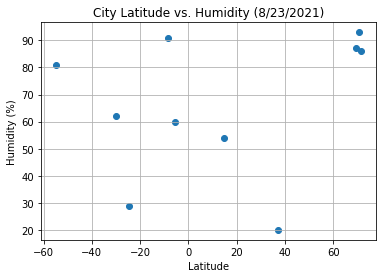

This scatter plot is analyzing any correlation between location related to the equator (in Latitude)
and the humidity of the region to show how location to the equator relates to humidity.


In [17]:
# Latitude vs. Humidity Plot
plt.figure()
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Display the plot
plt.show()

# A sentence or two explaining what the code is analyzing
print("This scatter plot is analyzing any correlation between location related to the equator (in Latitude)")
print("and the humidity of the region to show how location to the equator relates to humidity.")

## Latitude vs. Cloudiness Plot

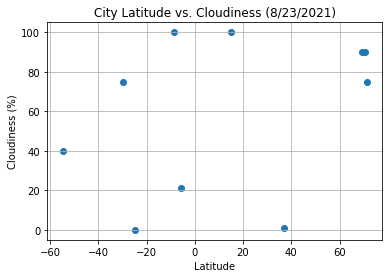

This scatter plot is analyzing any correlation between location related to the equator (in Latitude)
and the cloudiness of the region to show how location to the equator relates to cloud coverage.


In [18]:
# Latitude vs. Cloudiness Plot
plt.figure()
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Display the plot
plt.show()

# A sentence or two explaining what the code is analyzing
print("This scatter plot is analyzing any correlation between location related to the equator (in Latitude)")
print("and the cloudiness of the region to show how location to the equator relates to cloud coverage.")

## Latitude vs. Wind Speed Plot

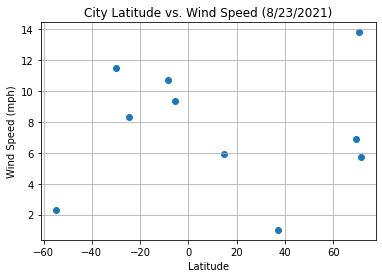

This scatter plot is analyzing any correlation between location related to the equator (in Latitude)
and the wind speed of the region to show how location to the equator relates to windiness.


In [19]:
# Latitude vs. Wind Speed
plt.figure()
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Display the plot
plt.show()

# A sentence or two explaining what the code is analyzing
print("This scatter plot is analyzing any correlation between location related to the equator (in Latitude)")
print("and the wind speed of the region to show how location to the equator relates to windiness.")

## Linear Regression

In [33]:
# Split the data into northern and southern hemisphere
north_h = weather_data.loc[weather_data["Lat"] >= 0]
south_h = weather_data.loc[weather_data["Lat"] <= 0]

# A function to build the linear regression data for the plots to follow
def my_lr_func(x, y):
    # Perform a linear regression on x vs. y items
    (slope, intercept, rvalue, pvalue, stsderr) = linregress(x, y)
    print(f"The r-value is: {rvalue**2}")
    
    # Get regression values
    regress_values = x * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Return the regress_values and line_eq
    return(regress_values, line_eq)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8434941494452283


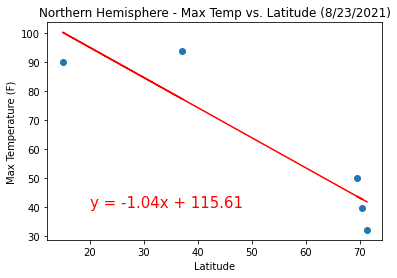

In [40]:
# Perform a linear regression on maximum temperature vs. latitude in the Northern Hemisphere
regress_values, line_eq = my_lr_func(north_h["Lat"], north_h["Max Temp"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(north_h["Lat"], north_h["Max Temp"], marker="o")
plt.plot(north_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (20,40), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/NH_Max_Temp_v_Lat.png")

# Display the plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7276480803634852


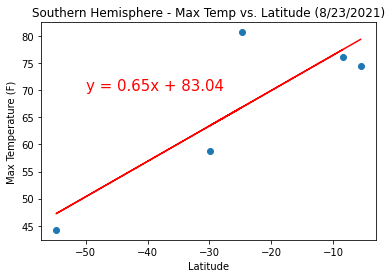

In [42]:
# Perform a linear regression on maximum temperature vs. latitude in the Southern Hemisphere
regress_values, line_eq = my_lr_func(south_h["Lat"], south_h["Max Temp"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(south_h["Lat"], south_h["Max Temp"], marker="o")
plt.plot(south_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-50,70), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/SH_Max_Temp_v_Lat.png")

# Display the plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.5663858324628154


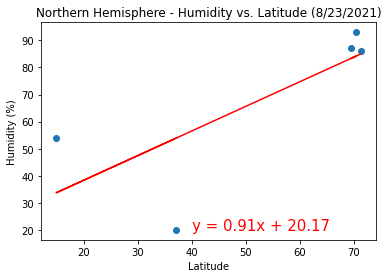

In [43]:
# Perform a linear regression on humidity vs. latitude in the Northern Hemisphere
regress_values, line_eq = my_lr_func(north_h["Lat"], north_h["Humidity"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(north_h["Lat"], north_h["Humidity"], marker="o")
plt.plot(north_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Northern Hemisphere - Humidity vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (40,20), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/NH_Humidity_v_Lat.png")

# Display the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.005249646298939982


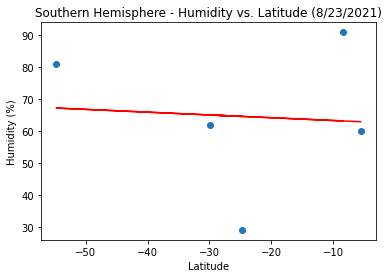

In [44]:
# Perform a linear regression on humidity vs. latitude in the Southern Hemisphere
regress_values, line_eq = my_lr_func(south_h["Lat"], south_h["Humidity"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(south_h["Lat"], south_h["Humidity"], marker="o")
plt.plot(south_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Southern Hemisphere - Humidity vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/SH_Humidity_v_Lat.png")

# Display the plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.031127159677934352


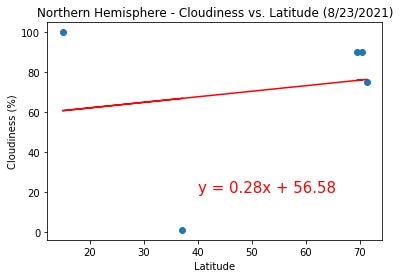

In [45]:
# Perform a linear regression on cloudiness vs. latitude in the Northern Hemisphere
regress_values, line_eq = my_lr_func(north_h["Lat"], north_h["Cloudiness"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(north_h["Lat"], north_h["Cloudiness"], marker="o")
plt.plot(north_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Northern Hemisphere - Cloudiness vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (40,20), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/NH_Cloudiness_v_Lat.png")

# Display the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01816425373957225


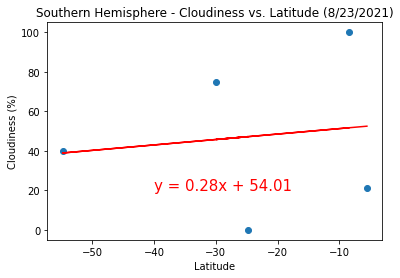

In [49]:
# Perform a linear regression on cloudiness vs. latitude in the Southern Hemisphere
regress_values, line_eq = my_lr_func(south_h["Lat"], south_h["Cloudiness"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(south_h["Lat"], south_h["Cloudiness"], marker="o")
plt.plot(south_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Southern Hemisphere - Cloudiness vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-40,20), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/SH_Cloudiness_v_Lat.png")

# Display the plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.24120831281027036


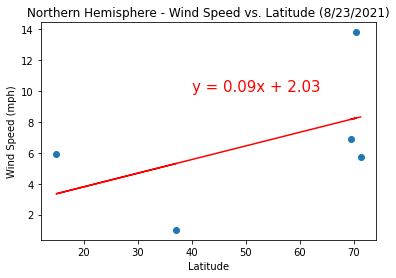

In [51]:
# Perform a linear regression on wind speed vs. latitude in the Northern Hemisphere
regress_values, line_eq = my_lr_func(north_h["Lat"], north_h["Wind Speed"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(north_h["Lat"], north_h["Wind Speed"], marker="o")
plt.plot(north_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Northern Hemisphere - Wind Speed vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/NH_Wind_Speed_v_Lat.png")

# Display the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.5988940926325089


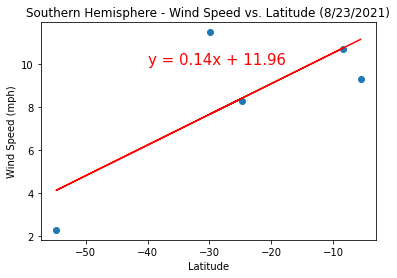

In [52]:
# Perform a linear regression on wind speed vs. latitude in the Southern Hemisphere
regress_values, line_eq = my_lr_func(south_h["Lat"], south_h["Wind Speed"])

# Create scatter plot of linear regression line
plt.figure()
plt.scatter(south_h["Lat"], south_h["Wind Speed"], marker="o")
plt.plot(south_h["Lat"], regress_values, "r-")

# Incorporate other graph properties
plt.title(f"Southern Hemisphere - Wind Speed vs. Latitude ({plot_date[1]}/{plot_date[2]}/{plot_date[0]})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.annotate(line_eq, (-40,10), fontsize=15, color="red")

# Save the figure
plt.savefig("../output_data/SH_Wind_Speed_v_Lat.png")

# Display the plot
plt.show()